/tmp/ipykernel_7630/1497369461.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['timestamp'] = pd.to_numeric(squid_ink_data['timestamp'])
/tmp/ipykernel_7630/1497369461.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['mid_price'] = pd.to_numeric(squid_ink_data['mid_price'])


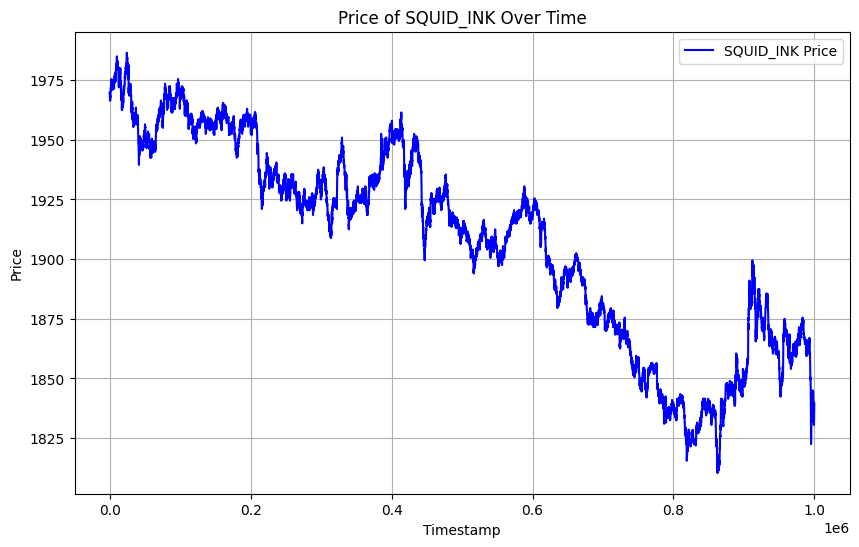

In [12]:
import pandas as pd

# Load the CSV file
file_path = 'prices_round_1_day_0.csv'
data = pd.read_csv(file_path)

import matplotlib.pyplot as plt

# Split the single column into multiple columns based on the delimiter
data = data['day;timestamp;product;bid_price_1;bid_volume_1;bid_price_2;bid_volume_2;bid_price_3;bid_volume_3;ask_price_1;ask_volume_1;ask_price_2;ask_volume_2;ask_price_3;ask_volume_3;mid_price;profit_and_loss'].str.split(';', expand=True)

# Rename the columns for easier access
data.columns = ['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 
                'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']

# Filter the data for the product SQUID_INK
squid_ink_data = data[data['product'] == 'SQUID_INK']

# Convert timestamp and mid_price to numeric for plotting
squid_ink_data['timestamp'] = pd.to_numeric(squid_ink_data['timestamp'])
squid_ink_data['mid_price'] = pd.to_numeric(squid_ink_data['mid_price'])

# Plot the price of SQUID_INK
plt.figure(figsize=(10, 6))
plt.plot(squid_ink_data['timestamp'], squid_ink_data['mid_price'], label='SQUID_INK Price', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Price of SQUID_INK Over Time')
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_7630/2683320024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid_ink_data['rolling_avg_5'] = squid_ink_data['mid_price'].rolling(window=5).mean()


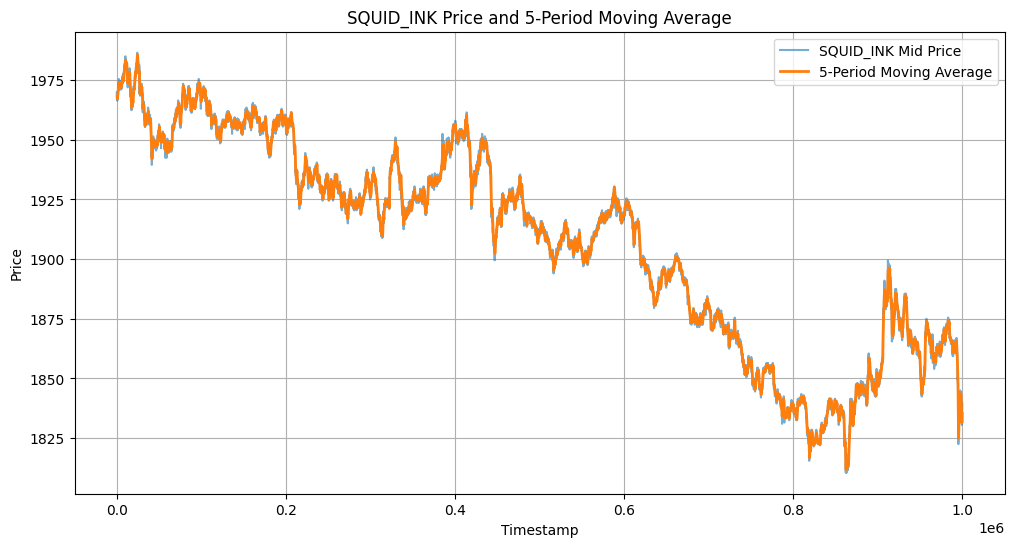

In [16]:
# Calculate the rolling average of past 5 values
squid_ink_data['rolling_avg_5'] = squid_ink_data['mid_price'].rolling(window=5).mean()

# Plot the original price and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(squid_ink_data['timestamp'], squid_ink_data['mid_price'], label='SQUID_INK Mid Price', alpha=0.6)
plt.plot(squid_ink_data['timestamp'], squid_ink_data['rolling_avg_5'], label='5-Period Moving Average', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('SQUID_INK Price and 5-Period Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Drop rows with NaN values in rolling_avg_5
valid_data = squid_ink_data.dropna(subset=['rolling_avg_5'])

# Calculate the squared differences
squared_diff = (valid_data['mid_price'] - valid_data['rolling_avg_5']) ** 2

# Calculate the MSE
mse_rolling_avg = squared_diff.mean()

print(f"Mean Squared Error (MSE) for 5-period Moving Average model: {mse_rolling_avg:.4f}")

# Optionally calculate RMSE
rmse_rolling_avg = np.sqrt(mse_rolling_avg)
print(f"Root Mean Squared Error (RMSE) for 5-period Moving Average model: {rmse_rolling_avg:.4f}")

Mean Squared Error (MSE) for 5-period Moving Average model: 1.5294
Root Mean Squared Error (RMSE) for 5-period Moving Average model: 1.2367
